# Logistic Regression

More information at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


## Metrics Classification

More detail at (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

The evelaution of perfomance ar based on the Confusion Matrix
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply Area Under Curve (AUC)
- Matthew Correlation Coefficient

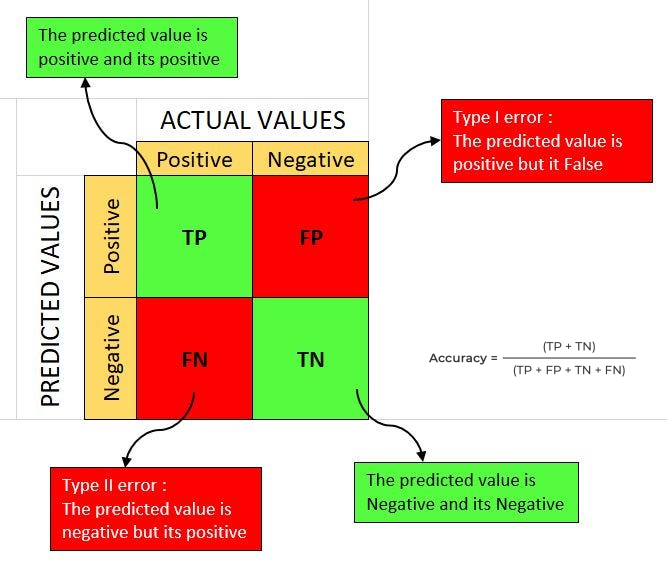

In [1]:
from IPython import display
display.Image("Image/ConfusionMatrix1.png")

### Micro/Macro Metrics

## Balanced/UnBalanced Dataset

In [4]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=42,
    shuffle=False,
)

LogisticRegression()

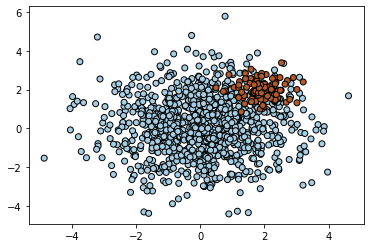

In [5]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# fit the model and get the separating hyperplane
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predict X_test
y_pred = clf.predict(X_test)


Different startegy to deal with this problem
- Collecting more data
- Use the right evaluation metrics
- Under-sampling the majority class
- Over-sampling the minority class
- Cost in your Model definition

## Stratified Train Test Val Split

## Cross Validation

## Iris dataset

In [ ]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# standardisation of data
scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

### Classification in 2 classes

In [ ]:
# we first extract the classes 0 and 1 from the dataset
Xbin = Xscaled[y<2]
ybin = y[y<2]

In [ ]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(Xbin, ybin, test_size=0.4)

In [ ]:
# logistic regression for binary classification
myLogReg = LogisticRegression()
#learning
myLogReg.fit(X_train,y_train)

In [ ]:
# evaluation
y_predBinaireTest = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predBinaireTest, display_labels=iris.target_names[0:2])

print("F1 score : ", f1_score(y_test,y_predBinaireTest))

### all classes from Iris dataset

In [ ]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.4)

In [ ]:
# logistic regression for binary classification
myLogReg = LogisticRegression()
#learning
myLogReg.fit(X_train,y_train)

In [ ]:
# evaluation
y_predBinaireTest = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predBinaireTest, display_labels=iris.target_names)

print("F1 score : ", f1_score(y_test, y_predBinaireTest, average=None))

## MNIST dataset

In [ ]:
# reading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
#display randomly one of the pictures

i = randint(0,len(y_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print("The true class is : ", y_train[i])

In [ ]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [ ]:
# standardisation of data

#your work

In [ ]:
# case of binary classification: let's choose 2 classes among the 10 classes: the 4's and the 8's

#your work

In [ ]:
# learn of logistic regressions

#your work

In [ ]:
# compute and display the f1 score and the confusion matrixs

#your work

The logistic regression has been build with default parameters. Follow the recommandation and try different hints:
- algorithm terminaison: max number of iterations, ....
- data preprocessing: standardisation YES
- solver (liblinear, sag, saga, ...)
- regularisation

Did you get better results ? Did some converge faster ?

### The whole dataset with the 10 classes

In [ ]:
# same work as the binary classification but now using the whole dataset with the 10 classes

## Do you obtain the same results with FMNIST ? (fashion MNIST)

In [ ]:
# your turn!